In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salvicnlp-2025/Test Data/BG/input-file.txt
/kaggle/input/salvicnlp-2025/Test Data/BG/raw-documents/20240904_EUZ_BG_46.txt
/kaggle/input/salvicnlp-2025/Test Data/BG/raw-documents/20240627_EUZ_BG_64.txt
/kaggle/input/salvicnlp-2025/Test Data/BG/raw-documents/20240417_URW_BG_79.txt
/kaggle/input/salvicnlp-2025/Test Data/BG/raw-documents/20240301_SHG_BG_59.txt
/kaggle/input/salvicnlp-2025/Test Data/BG/raw-documents/20240726_EUZ_BG_51.txt
/kaggle/input/salvicnlp-2025/Test Data/BG/raw-documents/20240216_URW_BG_92.txt
/kaggle/input/salvicnlp-2025/Test Data/BG/raw-documents/20231124_IHC_BG_35.txt
/kaggle/input/salvicnlp-2025/Test Data/BG/raw-documents/20240216_URW_BG_89.txt
/kaggle/input/salvicnlp-2025/Test Data/BG/raw-documents/20240321_URW_BG_82.txt
/kaggle/input/salvicnlp-2025/Test Data/BG/raw-documents/20240327_EUZ_BG_98.txt
/kaggle/input/salvicnlp-2025/Test Data/BG/raw-documents/20240321_URW_BG_66.txt
/kaggle/input/salvicnlp-2025/Test Data/BG/raw-documents/20240327_EUZ_BG_96

## Train Data

In [34]:
import pandas as pd
import os

# Paths
ANNOTATION_PATH = '/kaggle/input/salvicnlp-2025/Train Data/RU/subtask-1-annotations.txt'
RAW_TEXT_DIR = '/kaggle/input/salvicnlp-2025/Train Data/RU/raw-documents'

# Read annotation file
df = pd.read_csv(
    ANNOTATION_PATH,
    sep='\t',
    header=None,
    names=['file_name', 'start', 'end', 'label']
)

# Prepare a column for the extracted text
df['text'] = ''

for file_name in df['file_name'].unique():
    file_path = os.path.join(RAW_TEXT_DIR, file_name)
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        continue
    with open(file_path, 'r', encoding='utf-8') as f:
        full_text = f.read()
    for idx, row in df[df['file_name'] == file_name].iterrows():
        start = int(row['start'])
        end = int(row['end'])
        # Find the previous and next newline
        prev_nl = full_text.rfind('\n', 0, start)
        next_nl = full_text.find('\n', end)
        # Adjust indices to include the full line
        span_start = prev_nl + 1 if prev_nl != -1 else 0
        span_end = next_nl if next_nl != -1 else len(full_text)
        sentence = full_text[span_start:span_end].strip()
        df.at[idx, 'text'] = sentence

print(df[['file_name', 'start', 'end', 'label', 'text']].head())

           file_name  start   end  label  \
0  RU_migrants_2.txt      0    65   True   
1  RU_migrants_2.txt     67   599   True   
2  RU_migrants_2.txt    601   990  False   
3  RU_migrants_2.txt    992  1399  False   
4  RU_migrants_2.txt   1401  1525   True   

                                                text  
0  МИГРАЦИОННОЕ ЦУНАМИ УГРОЖАЕТ УТОПИТЬ АНГЛОГОВО...  
1  В последние годы западный мир столкнулся с огр...  
2  Анализ графиков миграционного прироста в указа...  
3  Этот резкий рост миграции вызвал серьезные дис...  
4  Для России это прекрасный пример поучиться на ...  


In [35]:
# Function to keep only text before first double newline
def remove_after_double_newline(text):
    if pd.isna(text):
        return text
    return text.split('\n\n', 1)[0]

# Apply the function to the 'text' column
df['text'] = df['text'].apply(remove_after_double_newline)

In [36]:
df.head()

,file_name,start,end,label,text
0,RU_migrants_2.txt,0,65,True,МИГРАЦИОННОЕ ЦУНАМИ УГРОЖАЕТ УТОПИТЬ АНГЛОГОВО...
1,RU_migrants_2.txt,67,599,True,В последние годы западный мир столкнулся с огр...
2,RU_migrants_2.txt,601,990,False,Анализ графиков миграционного прироста в указа...
3,RU_migrants_2.txt,992,1399,False,Этот резкий рост миграции вызвал серьезные дис...
4,RU_migrants_2.txt,1401,1525,True,Для России это прекрасный пример поучиться на ...


In [37]:
df.iloc[0]['text']

'МИГРАЦИОННОЕ ЦУНАМИ УГРОЖАЕТ УТОПИТЬ АНГЛОГОВОРЯЩИЕ СТРАНЫ ЗАПАДА'

## Trail Data

In [38]:
import pandas as pd
import os

# Paths
ANNOTATION_PATH = '/kaggle/input/salvicnlp-2025/TRIAL-ANNOTATED/RU/subtask-1-annotations.txt'
RAW_TEXT_DIR = '/kaggle/input/salvicnlp-2025/TRIAL-ANNOTATED/RU/raw-documents'

# Read annotation file
trial_df = pd.read_csv(
    ANNOTATION_PATH,
    sep='\t',
    header=None,
    names=['file_name', 'start', 'end', 'label']
)

# Prepare a column for the extracted text
trial_df['text'] = ''

for file_name in trial_df['file_name'].unique():
    file_path = os.path.join(RAW_TEXT_DIR, file_name)
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        continue
    with open(file_path, 'r', encoding='utf-8') as f:
        full_text = f.read()
    for idx, row in trial_df[trial_df['file_name'] == file_name].iterrows():
        start = int(row['start'])
        end = int(row['end'])
        # Find the previous and next newline
        prev_nl = full_text.rfind('\n', 0, start)
        next_nl = full_text.find('\n', end)
        # Adjust indices to include the full line
        span_start = prev_nl + 1 if prev_nl != -1 else 0
        span_end = next_nl if next_nl != -1 else len(full_text)
        sentence = full_text[span_start:span_end].strip()
        trial_df.at[idx, 'text'] = sentence

print(trial_df[['file_name', 'start', 'end', 'label', 'text']].head())

                        file_name  start  end  label  \
0  RU_discrediting_the_west_1.txt      0   26  False   
1  RU_discrediting_the_west_1.txt     28  207   True   
2  RU_discrediting_the_west_1.txt    209  294  False   
3  RU_discrediting_the_west_1.txt    296  416   True   
4  RU_discrediting_the_west_1.txt    418  467  False   

                                                text  
0                         Проект: «Расчеловечивание»  
1  США и страны Запада всегда были одержимы идеей...  
2  Но мир меняется. Другие государства развиваютс...  
3  Вашингтон и Брюссель теряют своё доминирование...  
4  Цель которого — чтобы люди перестали быть людьми.  


In [39]:
# Function to keep only text before first double newline
def remove_after_double_newline(text):
    if pd.isna(text):
        return text
    return text.split('\n\n', 1)[0]

# Apply the function to the 'text' column
trial_df['text'] = trial_df['text'].apply(remove_after_double_newline)

In [40]:
trial_df.head()

,file_name,start,end,label,text
0,RU_discrediting_the_west_1.txt,0,26,False,Проект: «Расчеловечивание»
1,RU_discrediting_the_west_1.txt,28,207,True,США и страны Запада всегда были одержимы идеей...
2,RU_discrediting_the_west_1.txt,209,294,False,Но мир меняется. Другие государства развиваютс...
3,RU_discrediting_the_west_1.txt,296,416,True,Вашингтон и Брюссель теряют своё доминирование...
4,RU_discrediting_the_west_1.txt,418,467,False,Цель которого — чтобы люди перестали быть людьми.


In [41]:
df = pd.concat([df, trial_df], ignore_index=True)

In [42]:
df.head()

,file_name,start,end,label,text
0,RU_migrants_2.txt,0,65,True,МИГРАЦИОННОЕ ЦУНАМИ УГРОЖАЕТ УТОПИТЬ АНГЛОГОВО...
1,RU_migrants_2.txt,67,599,True,В последние годы западный мир столкнулся с огр...
2,RU_migrants_2.txt,601,990,False,Анализ графиков миграционного прироста в указа...
3,RU_migrants_2.txt,992,1399,False,Этот резкий рост миграции вызвал серьезные дис...
4,RU_migrants_2.txt,1401,1525,True,Для России это прекрасный пример поучиться на ...


In [43]:
len(df)

257

## Test Data

In [44]:
import pandas as pd
import os

# Paths
ANNOTATION_PATH = '/kaggle/input/salvicnlp-2025/Test Data/RU/input-file.txt'
RAW_TEXT_DIR = '/kaggle/input/salvicnlp-2025/Test Data/RU/raw-documents'

# Read annotation file
test_df = pd.read_csv(
    ANNOTATION_PATH,
    sep='\t',
    header=None,
    names=['file_name', 'start', 'end']
)

# Prepare a column for the extracted text
test_df['text'] = ''

for file_name in test_df['file_name'].unique():
    file_path = os.path.join(RAW_TEXT_DIR, file_name)
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        continue
    with open(file_path, 'r', encoding='utf-8') as f:
        full_text = f.read()
    for idx, row in test_df[test_df['file_name'] == file_name].iterrows():
        start = int(row['start'])
        end = int(row['end'])
        # Find the previous and next newline
        prev_nl = full_text.rfind('\n', 0, start)
        next_nl = full_text.find('\n', end)
        # Adjust indices to include the full line
        span_start = prev_nl + 1 if prev_nl != -1 else 0
        span_end = next_nl if next_nl != -1 else len(full_text)
        sentence = full_text[span_start:span_end].strip()
        test_df.at[idx, 'text'] = sentence

print(test_df[['file_name', 'start', 'end', 'text']].head())

       file_name  start   end  \
0  RU_URW_14.txt      0   231   
1  RU_URW_14.txt    235   460   
2  RU_URW_14.txt    464   633   
3  RU_URW_14.txt    637  1055   
4  RU_URW_14.txt   1061  1268   

                                                text  
0  США прямо участвовали в убийстве российских со...  
1  Как написали коллеги, все маломальские успехи ...  
2  Украинская армия не играла никакой роли, а ее ...  
3  США хотели знать - будет ли разведка и высокот...  
4  Военные и офицеры ЦРУ в Висбадене помогали пла...  


In [45]:
# Apply the function to the 'text' column
test_df['text'] = test_df['text'].apply(remove_after_double_newline)

In [46]:
len(test_df)

590

In [15]:
%%capture
%pip install Dataset
%pip install transformers
%pip install sentencepiece
%pip install datasets
%pip install huggingface_hub
%pip install bitsandbytes
%pip install -U accelerate
%pip install -U peft
%pip install -U trl

In [16]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, f1_score
from sklearn.model_selection import train_test_split
from transformers import (
    AutoModelForSequenceClassification, 
    AutoTokenizer, 
    TrainingArguments, 
    Trainer,
    EarlyStoppingCallback
)
from datasets import Dataset
import os
from tqdm import tqdm

2025-05-06 19:06:09.550449: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746558369.978338      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746558370.110667      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [47]:
# Set seed for reproducibility
def set_seed(seed=42):
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    
set_seed()

In [48]:
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
HUGGINGFACE_TOKEN = user_secrets.get_secret("HUGGINGFACE_TOKEN")

!huggingface-cli login --token $HUGGINGFACE_TOKEN

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: write).
The token `basic task` has been saved to /root/.cache/huggingface/stored_tokens
Your token has been saved to /root/.cache/huggingface/token
Login successful.
The current active token is: `basic task`


In [49]:
len(df)

257

In [50]:
train_df = df[:200]
eval_df = df[201:]

In [51]:
print(f"Training set size: {len(train_df)}")
print(f"Evaluation set size: {len(eval_df)}")
print(f"Test set size: {len(test_df)}")

Training set size: 200
Evaluation set size: 56
Test set size: 590


## Check Token Legth

In [52]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('cointegrated/rubert-tiny2')

In [53]:
# Compute token lengths for each text
token_lengths = train_df['text'].apply(lambda x: len(tokenizer.encode(x, add_special_tokens=True)))
max_token_length = token_lengths.max()
avg_token_length = token_lengths.mean()
print(max_token_length)
print(avg_token_length)

193
51.51


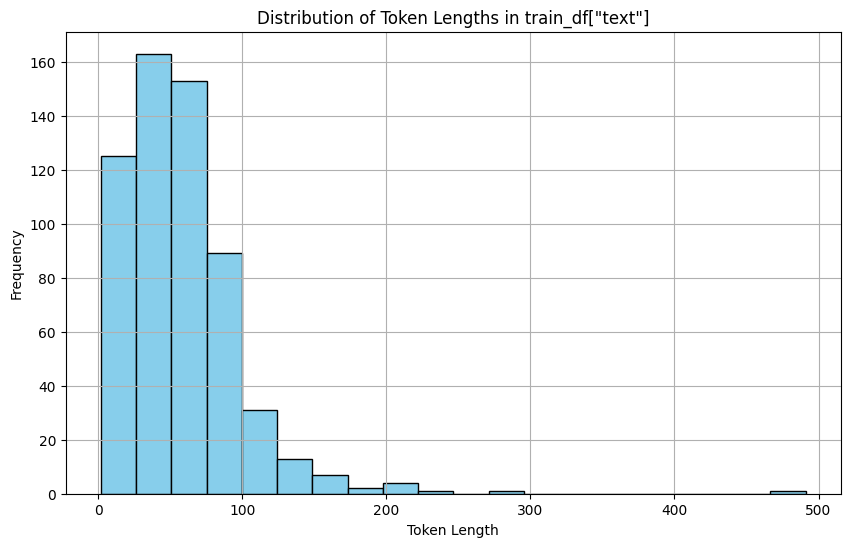

In [54]:
# Compute token lengths for each text
test_df['token_length'] = test_df['text'].apply(lambda x: len(tokenizer.encode(x, add_special_tokens=True)))

# Plot histogram of token lengths
plt.figure(figsize=(10,6))
plt.hist(test_df['token_length'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Token Lengths in train_df["text"]')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [55]:
train_df['label'] = train_df['label'].map({True: 1, False: 0})
eval_df['label'] = eval_df['label'].map({True: 1, False: 0})

/tmp/ipykernel_31/3147424746.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['label'] = train_df['label'].map({True: 1, False: 0})
/tmp/ipykernel_31/3147424746.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eval_df['label'] = eval_df['label'].map({True: 1, False: 0})


In [56]:
print(f"Number of labels in train {train_df['label'].value_counts()}")
print(f"Number of labels in eval {eval_df['label'].value_counts()}")

Number of labels in train label
1    135
0     65
Name: count, dtype: int64
Number of labels in eval label
1    37
0    19
Name: count, dtype: int64


In [57]:
# Function to compute metrics
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='binary')
    acc = accuracy_score(labels, predictions)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

## Models

In [58]:
# Function to train a model
def train_model(model_name, train_dataset, eval_dataset, output_dir):
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    
    def tokenize_function(examples):
        return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=512)
    
    # Tokenize datasets
    tokenized_train = train_dataset.map(tokenize_function, batched=True)
    tokenized_eval = eval_dataset.map(tokenize_function, batched=True)
    
    # Load model
    model = AutoModelForSequenceClassification.from_pretrained(
        model_name, 
        num_labels=2
    )
    
    training_args = TrainingArguments(
    output_dir=output_dir,
    eval_strategy="epoch",
    save_strategy="epoch",
    save_total_limit=1,
    learning_rate=2e-5,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    num_train_epochs=5,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    greater_is_better=True,
    push_to_hub=False,
    report_to="none",
    )
    
    # Initialize Trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=tokenized_train,
        eval_dataset=tokenized_eval,
        compute_metrics=compute_metrics,
        callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]
    )
    
    # Train the model
    trainer.train()
    
    # Save model and tokenizer
    trainer.save_model(output_dir)
    tokenizer.save_pretrained(output_dir)
    
    return trainer, tokenizer

In [59]:
# Convert to HF datasets
train_dataset = Dataset.from_pandas(train_df)
eval_dataset = Dataset.from_pandas(eval_df)
test_dataset = Dataset.from_pandas(test_df)

In [30]:
# Define models for ensemble
models = [
    ("cointegrated/rubert-tiny2", "./cointegrated_rubert_RU"),
    # ("FacebookAI/xlm-roberta-large", "./xlmroberta_BG"),
    # ("usmiva/bert-web-bg", "./usmiva_bert_web_BG"),
    # ("DeepPavlov/bert-base-bg-cs-pl-ru-cased", "./rmihaylov"),
]

In [31]:
# Train all models
trained_models = []
for model_name, output_dir in models:
    print(f"Training {model_name}...")
    trainer, tokenizer = train_model(model_name, train_dataset, eval_dataset, output_dir)
    trained_models.append((trainer, tokenizer, output_dir))
    print(f"Finished training {model_name}")

Training cointegrated/rubert-tiny2...


Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:   0%|          | 0/56 [00:00<?, ? examples/s]

config.json:   0%|          | 0.00/693 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/118M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at cointegrated/rubert-tiny2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,No log,0.626695,0.678571,0.804348,0.672727,1.000000
2,No log,0.606299,0.660714,0.795699,0.660714,1.000000
3,No log,0.595397,0.660714,0.795699,0.660714,1.000000


/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Finished training cointegrated/rubert-tiny2


In [32]:
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=512)

In [33]:
tokenized_eval = eval_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/56 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


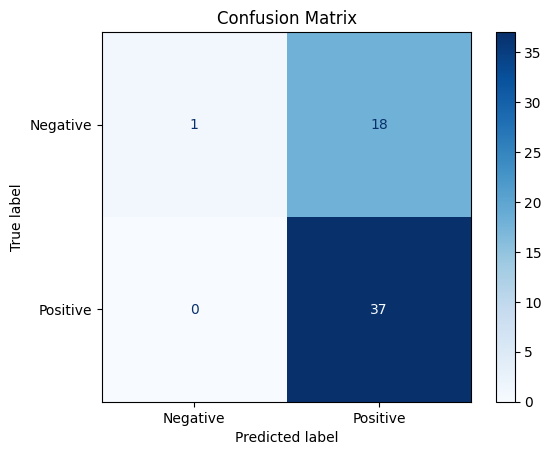

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict on the evaluation dataset
predictions = trainer.predict(tokenized_eval)

# Extract true and predicted labels
true_labels = predictions.label_ids
predicted_labels = np.argmax(predictions.predictions, axis=-1)

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [35]:
_, tokenizer, output_dir = trained_models[0] 

In [36]:
# Load the saved model
model = AutoModelForSequenceClassification.from_pretrained(output_dir)

In [37]:
model_name = "mahsharyahan/cointegrated_rubert_RU_St_1"
# tokenizer.push_to_hub(model_name)
trainer.push_to_hub(model_name)

Upload 2 LFS files:   0%|          | 0/2 [00:00<?, ?it/s]

training_args.bin:   0%|          | 0.00/5.30k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/117M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/mahsharyahan/cointegrated_rubert_RU/commit/0ad390a49646fc7a68502745091fe02b82834478', commit_message='mahsharyahan/cointegrated_rubert_RU_St_1', commit_description='', oid='0ad390a49646fc7a68502745091fe02b82834478', pr_url=None, repo_url=RepoUrl('https://huggingface.co/mahsharyahan/cointegrated_rubert_RU', endpoint='https://huggingface.co', repo_type='model', repo_id='mahsharyahan/cointegrated_rubert_RU'), pr_revision=None, pr_num=None)

In [60]:
# Define models for ensemble
model_names = [
    "mahsharyahan/DeepPavlov_rubert_conv_RU",
    "mahsharyahan/cointegrated_rubert_RU",
    "mahsharyahan/ai_forever_rubert_RU"
]

In [61]:
# Function to get predictions from a model
def get_predictions(model_name, dataset):
    print(f"Getting predictions from {model_name}...")
    
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSequenceClassification.from_pretrained(model_name)
    model.eval()
    
    # Tokenize the dataset
    def tokenize_function(examples):
        return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=512)
    
    tokenized_dataset = dataset.map(tokenize_function, batched=True)
    
    # Create a Trainer for prediction
    trainer = Trainer(
        model=model,
        args=TrainingArguments(
            output_dir="./tmp_trainer",
            per_device_eval_batch_size=16,
            report_to="none",
        ),
    )
    
    # Get predictions
    raw_predictions = trainer.predict(tokenized_dataset)
    
    # Convert logits to probabilities
    probabilities = torch.nn.functional.softmax(
        torch.tensor(raw_predictions.predictions), dim=-1
    ).numpy()
    
    return probabilities

In [62]:
# Get predictions from all models for evaluation dataset
eval_predictions = []
for model_name in model_names:
    probabilities = get_predictions(model_name, eval_dataset)
    eval_predictions.append(probabilities)

Getting predictions from mahsharyahan/DeepPavlov_rubert_conv_RU...


tokenizer_config.json:   0%|          | 0.00/1.30k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.40M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.01M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/867 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/711M [00:00<?, ?B/s]

Map:   0%|          | 0/56 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Getting predictions from mahsharyahan/cointegrated_rubert_RU...


tokenizer_config.json:   0%|          | 0.00/1.46k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.41M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/705 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/117M [00:00<?, ?B/s]

Map:   0%|          | 0/56 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Getting predictions from mahsharyahan/ai_forever_rubert_RU...


tokenizer_config.json:   0%|          | 0.00/1.30k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.78M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.71M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/844 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/713M [00:00<?, ?B/s]

Map:   0%|          | 0/56 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


In [63]:
# Get predictions from all models for test dataset
test_predictions = []
for model_name in model_names:
    probabilities = get_predictions(model_name, test_dataset)
    test_predictions.append(probabilities)

Getting predictions from mahsharyahan/DeepPavlov_rubert_conv_RU...


Map:   0%|          | 0/590 [00:00<?, ? examples/s]

Getting predictions from mahsharyahan/cointegrated_rubert_RU...


Map:   0%|          | 0/590 [00:00<?, ? examples/s]

Getting predictions from mahsharyahan/ai_forever_rubert_RU...


Map:   0%|          | 0/590 [00:00<?, ? examples/s]

In [64]:
# Try different weight combinations to find the best F1 score on eval set
best_f1 = 0
best_weights = [0.5, 0.25, 0.25]  # Default equal weights

weight_options = [
    [0.4, 0.1, 0.5],
    [0.5, 0.25, 0.25],
    [0.33, 0.33, 0.34],
    [0.6, 0.2, 0.2],
    [0.2, 0.4, 0.4],
    [0.2, 0.6, 0.2]
]

print("Finding optimal weights based on evaluation set performance...")
for weights in weight_options:
    # Ensemble predictions with current weights
    ensemble_probs = np.zeros_like(eval_predictions[0])
    for i, pred in enumerate(eval_predictions):
        ensemble_probs += weights[i] * pred
    
    # Calculate metrics
    predictions = np.argmax(ensemble_probs, axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(
        eval_df['label'], 
        predictions, 
        average='binary'
    )
    
    print(f"Weights {weights}: F1 = {f1:.4f}, Precision = {precision:.4f}, Recall = {recall:.4f}")
    
    if f1 > best_f1:
        best_f1 = f1
        best_weights = weights

print(f"\nBest weights found: {best_weights} with F1: {best_f1:.4f}")

Finding optimal weights based on evaluation set performance...
Weights [0.4, 0.1, 0.5]: F1 = 0.8333, Precision = 0.7447, Recall = 0.9459
Weights [0.5, 0.25, 0.25]: F1 = 0.8718, Precision = 0.8293, Recall = 0.9189
Weights [0.33, 0.33, 0.34]: F1 = 0.8333, Precision = 0.7447, Recall = 0.9459
Weights [0.6, 0.2, 0.2]: F1 = 0.8718, Precision = 0.8293, Recall = 0.9189
Weights [0.2, 0.4, 0.4]: F1 = 0.8235, Precision = 0.7292, Recall = 0.9459
Weights [0.2, 0.6, 0.2]: F1 = 0.8235, Precision = 0.7292, Recall = 0.9459

Best weights found: [0.5, 0.25, 0.25] with F1: 0.8718


In [65]:
# Use best weights for final ensemble on evaluation set
eval_ensemble_probs = np.zeros_like(eval_predictions[0])
for i, pred in enumerate(eval_predictions):
    eval_ensemble_probs += best_weights[i] * pred

eval_predictions_final = np.argmax(eval_ensemble_probs, axis=1)
eval_precision, eval_recall, eval_f1, _ = precision_recall_fscore_support(
    eval_df['label'], 
    eval_predictions_final, 
    average='binary'
)
eval_accuracy = accuracy_score(eval_df['label'], eval_predictions_final)

print("\nFinal Evaluation Set Results:")
print(f"F1 Score: {eval_f1:.4f}")
print(f"Precision: {eval_precision:.4f}")
print(f"Recall: {eval_recall:.4f}")
print(f"Accuracy: {eval_accuracy:.4f}")


Final Evaluation Set Results:
F1 Score: 0.8718
Precision: 0.8293
Recall: 0.9189
Accuracy: 0.8214


In [66]:
# Use best weights for test set predictions
test_ensemble_probs = np.zeros_like(test_predictions[0])
for i, pred in enumerate(test_predictions):
    test_ensemble_probs += best_weights[i] * pred

test_predictions_final = np.argmax(test_ensemble_probs, axis=1)

# Create submission dataframe
submission_df = test_df.copy()
submission_df['prediction'] = test_predictions_final

# Calculate test metrics if labels are available
if 'label' in submission_df.columns:
    test_precision, test_recall, test_f1, _ = precision_recall_fscore_support(
        submission_df['label'], 
        submission_df['prediction'], 
        average='binary'
    )
    test_accuracy = accuracy_score(submission_df['label'], submission_df['prediction'])
    
    print("\nTest Set Results:")
    print(f"F1 Score: {test_f1:.4f}")
    print(f"Precision: {test_precision:.4f}")
    print(f"Recall: {test_recall:.4f}")
    print(f"Accuracy: {test_accuracy:.4f}")

In [67]:
submission_df.head()

,file_name,start,end,text,token_length,prediction
0,RU_URW_14.txt,0,231,США прямо участвовали в убийстве российских со...,39,0
1,RU_URW_14.txt,235,460,"Как написали коллеги, все маломальские успехи ...",41,0
2,RU_URW_14.txt,464,633,"Украинская армия не играла никакой роли, а ее ...",39,0
3,RU_URW_14.txt,637,1055,США хотели знать - будет ли разведка и высокот...,90,1
4,RU_URW_14.txt,1061,1268,Военные и офицеры ЦРУ в Висбадене помогали пла...,49,0


In [68]:
submission_df = submission_df.drop(['text','token_length'], axis=1)

In [69]:
submission_df = submission_df.rename(columns={
    'file_name': 'documentID',
    'prediction': 'persuasion_flag'
})

In [70]:
submission_df

,documentID,start,end,persuasion_flag
0,RU_URW_14.txt,0,231,0
1,RU_URW_14.txt,235,460,0
2,RU_URW_14.txt,464,633,0
3,RU_URW_14.txt,637,1055,1
4,RU_URW_14.txt,1061,1268,0
...,...,...,...,...
585,RU_1029.txt,1052,1318,1
586,RU_1029.txt,1321,1622,1
587,RU_1029.txt,1625,1776,1
588,RU_1029.txt,1779,2091,1


In [73]:
# Save predictions
submission_df.to_csv('subtask1_RU_1.csv', index=False)
# print("\nPredictions saved to 'ensemble_predictions.csv'")

In [74]:
from IPython.display import FileLink

FileLink("subtask1_RU_1.csv")

/kaggle/working/subtask1_RU_1.csv